<a href="https://colab.research.google.com/github/OzKedem/NeuralNetDiabetes/blob/master/DiabetesDetection_OzKedem(Hebrew).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# פרויקט למידה עמוקה - עוז קדם - חיזוי מחלת הסוכרת 

עבודה זו עליה אני עובד במסגרת פרויקט 5 יחידות במקצוע מדעי המחשב מנסה ליצור רשת נוירונים אשר מסוגלת לחזות במהירות ודיוק גבוה ככל שניתן האם אדם חולה בסוכרת סוג 2

מידע נוסף על העבודה ניתן למצוא פה: 
https://github.com/OzKedem/NeuralNetDiabetes

## ייבוא הספריות הנחוצות לנו

In [49]:
#ראשית , ניבא את הספריות הנחוצות לנו 
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#1. טעינת מאגר המידע



יש לשים לב כי העלתם את מאגר המידע ושאכן הוא נמצא בתוך הגוגל קולאב


כל הנתונים במאגר הם מספריים


לכן אני משתמש בפונקציית טעינת הטקסט של נאמפיי בבטחה

`loadtxt()`


בטבלה יש שמונה משתני אינפוט ומשתנה אווטפוט יחיד
טורים 0-7 אינפוט
טור 8 - אווטפוט

 : המשתנים מסודרים כדלקמן

<b>משתני אינפוט (X):</b>

0. מספר ההריונות
1. ריכוז הגלוקוז בדם לאחר בדיקת סבילות גלוקוז אוראלית הלוקחת כשעתיים
2. לחץ דם דיאסטולי
3. עובי העור מעל שריר הטרייספ
4. ריכוז האינסולין בדם לאחר בדיקת סבילות אינסולין הלוקחת כשעתיים
5. BMI (W/H^2) - W [KG] , H [m]
6. פונקציית הסיכוי הגנטית לחלות בסוכרת 
7. גיל

<b>משתני אווטפוט (Y):</b>

8. מצב המטופל (0 או 1)




In [50]:
#יצירת המערך הדו מימדי אשר מחזיק בתוכו את מאגר הנתונים
dataset = loadtxt('/content/pima-indians-diabetes.csv', delimiter=',')

In [51]:
dataset
#מצורפת דוגמה לדרך בה הטבלה מיוצגת כמערך - 

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [52]:
# פיצול משתני האינפוט - איקס והאווטפוט ווי. 
X = dataset[:,0:8]
y = dataset[:,8]

In [53]:
#ביצוע סקיילינג לנתוני האינפוט
X_scaled = scale(X) 
print('Scaled_X:\n', X_scaled)

Scaled_X:
 [[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [54]:
# פיצול הנתונים לסט אימון וסט טסטינג
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [55]:
# הופך מערך מספרים לכדי מטריצה
y_train = np_utils.to_categorical(y_train)

print('Y_Train Encoded:\n', y_train)

Y_Train Encoded:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


## 2. הגדרת המודל

* ארכיטקטורת המודל
 * 3 שכבות
 * 22 נוירונים
 * פונקציות הפעלה - סיגמואיד, רלו וליקי רלו
 * פונקציית אופטימיזציה - אדם
 * פונקציית ההפסד - אנטרופיה בינארית מוצלבת



In [56]:
# הגדרת המודל בעזרת קראס
model = Sequential()
model.add(Dense(12, input_dim=8, activation='LeakyReLU'))
model.add(Dense(8, activation='ReLU'))
model.add(Dense(2, activation='sigmoid'))

## 3. קומפילציית המודל

In [57]:
# קומפליצית מודל הקראס
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## 4. אימון המודל

In [58]:
# אימון המודל בעזרת מאגר הנתונים

history = model.fit(X_train, y_train, validation_split=0.33, epochs=150, batch_size=10)

# משתנה ההיסטוריה, מכיל בתוכו מידע לגבי אימוני המודל לאורך הדורות

Epoch 1/150
35/35 [==============================] - 2s 14ms/step - loss: 0.8027 - accuracy: 0.3081 - val_loss: 0.7523 - val_accuracy: 0.4412
Epoch 2/150
35/35 [==============================] - 0s 6ms/step - loss: 0.7323 - accuracy: 0.4826 - val_loss: 0.7064 - val_accuracy: 0.5706
Epoch 3/150
35/35 [==============================] - 0s 6ms/step - loss: 0.6905 - accuracy: 0.5494 - val_loss: 0.6784 - val_accuracy: 0.6294
Epoch 4/150
35/35 [==============================] - 0s 6ms/step - loss: 0.6623 - accuracy: 0.5930 - val_loss: 0.6577 - val_accuracy: 0.6588
Epoch 5/150
35/35 [==============================] - 0s 6ms/step - loss: 0.6390 - accuracy: 0.6221 - val_loss: 0.6386 - val_accuracy: 0.6588
Epoch 6/150
35/35 [==============================] - 0s 8ms/step - loss: 0.6178 - accuracy: 0.6395 - val_loss: 0.6203 - val_accuracy: 0.6647
Epoch 7/150
35/35 [==============================] - 0s 9ms/step - loss: 0.5975 - accuracy: 0.6599 - val_loss: 0.6038 - val_accuracy: 0.6706
Epoch 8/150


## 5. הערכת המודל

In [59]:
#הערכת מודל הקראס בזמן האימון
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8152
Accuracy: 81.52


## 6. הניסיון לחזות תוצאות 

In [60]:
# מחזיק בתוכו מידע לגבי הערכת המודל בהינתן נתוני הטסט
predictions = np.argmax(model.predict(X_test), axis=-1)

#בדיקת ההצלחה עבור N המקרים הראשונה
n = 5
for i in range(n):
    print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], y[i]))

[0.6399472601593618, -0.7165334717264664, -0.5741277459136239, 0.7818138030884967, 0.956859653030945, 0.2547804694892943, -0.1264714020604746, 0.8303811324799336] => 0 (expected 1)
[-0.5479185907225473, -0.2783734371474431, 0.30473400231574344, 0.7190857419965655, -0.6928905722954664, 0.47054318659717476, -0.9781448690748636, -1.0415494364835027] => 0 (expected 0)
[-0.5479185907225473, -0.4035620184557355, -0.2639412465385531, -1.2882122129452327, -0.6928905722954664, -0.1513611156549505, -0.9479436823013037, -1.0415494364835027] => 0 (expected 1)
[1.233880185600316, -0.4348591637828086, 0.5632227517949692, -1.2882122129452327, -0.6928905722954664, -0.9382604368719248, 1.1600991544931767, 0.06459135426761878] => 0 (expected 0)
[0.9369137228798391, 0.4727580507023112, 1.0802002507534205, -1.2882122129452327, -0.6928905722954664, -0.26558843647676966, -0.7908975110787921, 1.4259954044228451] => 0 (expected 1)


In [61]:
#שיעור פונקציית הדיוק
y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1) 

accuracy_score(y_test, y_pred)

0.7401574803149606

In [62]:
#הדפסת מטריצת המודל, דיוק כנגד הפסד
print(model.metrics_names)

['loss', 'accuracy']


אחד מן האובייקטים היעילים והבסיסיים ביותר אשר משתמשים 
בהם בעת אימון מודל למיקה עמוקה היא פונקציית ההיסטוריה

זו מתעדת את מטריצות האימון של כל דור, אלו מכילות מידע 
בנוגע להפסד ולדיוק של הפונקציה בכל דור

אובייקט ההיסטוריה מוחזר בעת הקריאה לפונקציית האימון והמטריצות שלו מאוחסנות בדיקצ'נרי הנ"ל (מבנה הנתונים)

In [63]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## 7. שרטוט גרפי הדיוק וההפסד

לגרפי הדיוק וההפסד היכולת להדגים דברים יעילים במודל
 כגון

 * מהירות ההתכנסות שלו לאורך הדורות (השיפוע) 
 * האם המודל אומן יתר על המידה (ירידה של הגרף) 
 * עד כמה המודל מדויק

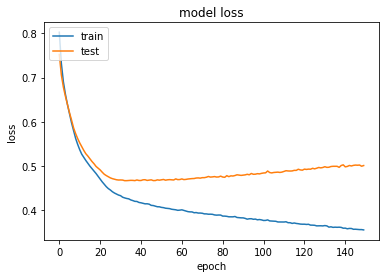

In [64]:
#  סיכום ההיסטוריה עבור ההפסד
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

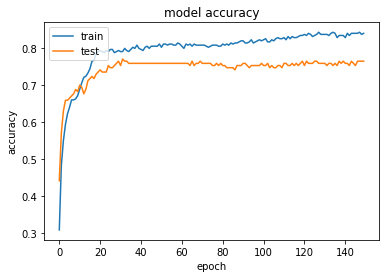

In [65]:
# סיכום ההיסטוריה עבור הדיוק
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# מידע נוסף על העבודה ניתן למצוא פה:
https://github.com/OzKedem/NeuralNetDiabetes